<a href="https://colab.research.google.com/github/anggara23-dotcom/ProjectML/blob/main/ProjectDW_AJI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas mysql-connector-python openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 50.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


Upload File Excel yang berisi Data Penjualan

In [3]:
from google.colab import files
uploaded = files.upload()   # pilih file Excel
file_path = list(uploaded.keys())[0]

xls = pd.ExcelFile(file_path)
print("Sheet tersedia:", xls.sheet_names)


Saving new_gudang pipa.xlsx to new_gudang pipa.xlsx
Sheet tersedia: ['dim_customer', 'dim_barang', 'dim_supplier', 'dim_karyawan', 'fact_penjualan']


Pada proses diatas file excel terdapat 5 sheet yang berisi data dari PT Market Sentosa

# Fungsi Cleaning

In [4]:
def normalize_jenis_kelamin(x):
    if pd.isna(x): return 'Unknown'
    s = str(x).strip().lower()
    if s in ('m','male','man','l','laki','laki-laki'): return 'Male'
    if s in ('f','female','woman','perempuan','p'): return 'Female'
    return 'Unknown'

def clean_df(df):
    for c in df.select_dtypes(include=['object']):
        df[c] = df[c].str.strip()
    return df


Disini kita melakukan fungsi cleaning/cleansing yang dimana ini adalah bagian dari prose ETL yaitu T (Transform). yang bertujuan untuk memastikan data rapi, konsisten, dan siap pakai untuk di analisis.

# Proses Extract + Transform

In [5]:
dim_customer = pd.read_excel(xls, sheet_name="dim_customer")
dim_barang   = pd.read_excel(xls, sheet_name="dim_barang")
dim_supplier    = pd.read_excel(xls, sheet_name="dim_supplier")
dim_karyawan     = pd.read_excel(xls, sheet_name="dim_karyawan")
fact_penjualan     = pd.read_excel(xls, sheet_name="fact_penjualan")

# Cleaning khusus gender
dim_customer['jenis_kelamin'] = dim_customer['jenis_kelamin'].apply(normalize_jenis_kelamin)

# Cleaning umum
dim_customer = clean_df(dim_customer)
dim_baarang   = clean_df(dim_barang)
dim_supplier    = clean_df(dim_supplier)
dim_karyawan     = clean_df(dim_karyawan)
fact_penjualan     = clean_df(fact_penjualan)


print("✅ Data berhasil dibersihkan")

✅ Data berhasil dibersihkan


Data yang dibaca dari file excel yang sudah kita import dan memiliki beberapa lembar kerja (sheet). Yang dimana setiap sheet dimuat kedalam DataFrame pandas yang terpisah, sesuai dengan jenis dimensi atau fakta dalam model data.

Kolom gender pada tabel dim_customer dinormalisasi menggunakan fungsi normalize_gender. Dengan tujuan menyeragamkan nilai gender (Misalnya: "L", "P", "Male", "Female" -> menjadi format standar seperti "Laki-laki", "Perempuan".

Lalu dengan fungsi clean_df() diterapkan pada setiap DataFrame untuk membersihkan data secara umum:

Menghapus duplikat
Mengisi nilai yang hilang (missing vlue)
Membersihkan teks (strip spasi dll)
Mengonversi tipe data yang tidak sesuai
kemudiantanggal diubah menjadi tipedata datetime untuk memudahkan analisis waktu.

In [6]:
print(fact_penjualan.columns)

Index(['id_penjualan', 'tgl_penjualan', 'id_customer', 'nama_customer',
       'id_barang', 'nama_barang', 'harga_barang', 'qty', 'total',
       'id_karyawan', 'nama_karyawan', 'id_supplier', 'nama_supplier'],
      dtype='object')


# Load (Menyimpan hasil ke CSV)

In [7]:
dim_customer.to_csv("dim_customer_clean.csv", index=False)
dim_barang.to_csv("dim_barang_clean.csv", index=False)
dim_supplier.to_csv("dim_supplier_clean.csv", index=False)
dim_karyawan.to_csv("dim_karyawan_clean.csv", index=False)
fact_penjualan.to_csv("fact_penjualan_clean.csv", index=False)

from google.colab import files
files.download("dim_customer_clean.csv")
files.download("dim_barang_clean.csv")
files.download("dim_supplier_clean.csv")
files.download("dim_karyawan_clean.csv")
files.download("fact_penjualan_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File Excel yang sudah di cleansing akan dikonversi ke CSV

Proses konversi dari Excel ke CSV dalam workflow data science merupakan langkah strategis yang didasarkan pada pertimbangan efisiensi dan universalitas. Format Excel, meskipun kaya akan fitur formatting dan formula, justru mengandung kompleksitas yang seringkali menjadi hambatan dalam proses analisis data yang berskala besar. Setiap file Excel membawa serta baggage berupa informasi formatting, style, formula, dan metadata yang sebenarnya tidak diperlukan untuk analisis data inti.

# Analisis + Visualisasi

In [8]:
!pip install pandas matplotlib seaborn openpyxl

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
file_path = '/content/new_gudang pipa.xlsx'  # Ganti sesuai lokasi file di Colab
df = pd.read_excel(file_path, sheet_name="fact_penjualan") # Load the dim_barang sheet

In [11]:
# --- Menampilkan contoh data ---
print("Contoh data dari sheet fact_penjualan:")
display(df.head())


Contoh data dari sheet fact_penjualan:


,id_penjualan,tgl_penjualan,id_customer,nama_customer,id_barang,nama_barang,harga_barang,qty,total,id_karyawan,nama_karyawan,id_supplier,nama_supplier
0,SELL-0001,2024-01-05,CUS-0060,Rian Cahyani,B-00019,"Rucika Black 630 mm 12,5 Bar",2633748,32,84279936,K-00009,Romy Sumanto,SPL-0005,CV. Tirta Guna Mandiri
1,SELL-0002,2024-01-05,CUS-0061,Nina Wijaya,B-00020,"Rucika Black 710 mm 12,5 Bar",3344380,200,668876000,K-00008,Aliando Gunawan,SPL-0005,CV. Tirta Guna Mandiri
2,SELL-0003,2024-01-05,CUS-0062,Putri Yuliana,B-00001,"BALL VALVE FEMALE 3/4""\t",22878,342,7824276,K-00005,Syawal Awaliyah,SPL-0001,PT. Golden Piping Indonesia
3,SELL-0004,2024-01-05,CUS-0063,Tia Herlina,B-00002,"BALL VALVE FEMALE 1 1/4""",50840,76,3863840,K-00007,Kesya Putri,SPL-0001,PT. Golden Piping Indonesia
4,SELL-0005,2024-01-05,CUS-0064,Budi Wibowo,B-00003,"PVC ELBOW AW 90' 2"" AMB",1840,59,108560,K-00009,Romy Sumanto,SPL-0001,PT. Golden Piping Indonesia


In [12]:
# --- Membersihkan nama kolom ---
df.columns = df.columns.str.strip()

In [13]:
# --- Konversi kolom tanggal jika ada ---
for col in df.columns:
    if 'tgl' in col.lower() or 'tanggal' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')
        tanggal_col = col
        break
else:
    tanggal_col = None

In [14]:
# --- Jika ada kolom tanggal, ubah ke tipe datetime ---
if 'Tanggal' in df.columns:
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

In [15]:
# --- Konversi kolom numerik (jumlah, total penjualan, harga) ---
numeric_cols = []
for col in df.columns:
    if any(x in col.lower() for x in ['jumlah', 'qty', 'total', 'harga']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
        numeric_cols.append(col)

print(f"\nKolom numerik terdeteksi: {numeric_cols}")
if tanggal_col:
    print(f"Kolom tanggal terdeteksi: {tanggal_col}")



Kolom numerik terdeteksi: ['harga_barang', 'qty', 'total']
Kolom tanggal terdeteksi: tgl_penjualan


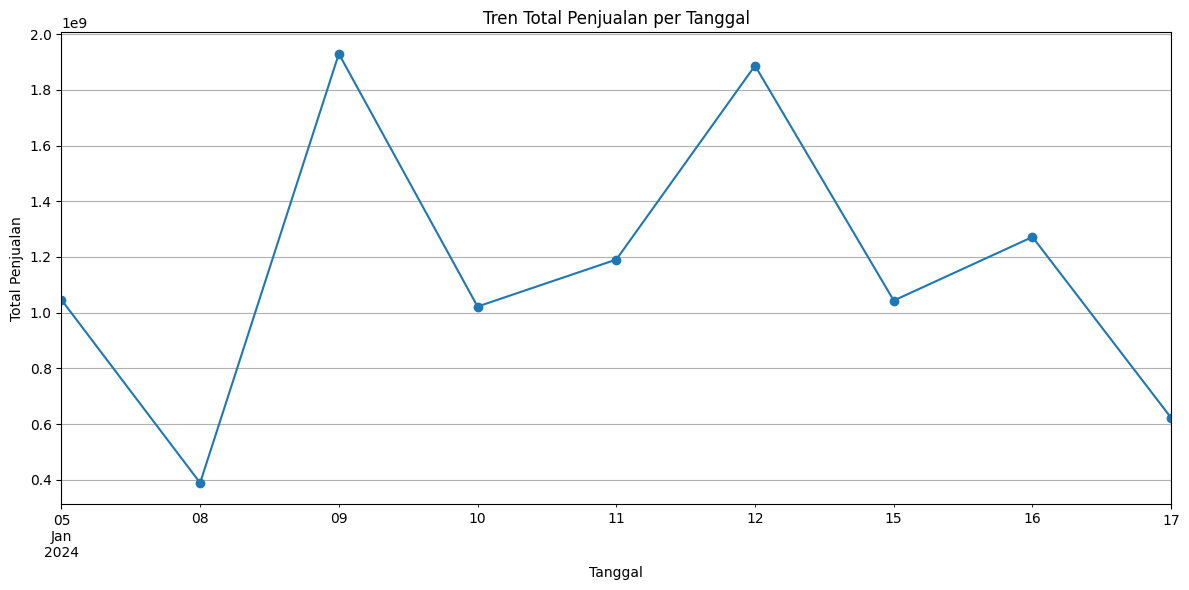

In [16]:
# --- GRAFIK 1: Tren total penjualan per tanggal ---
if tanggal_col and any('total' in c.lower() for c in df.columns):
    plt.figure(figsize=(12,6))
    df.groupby(tanggal_col)[[c for c in df.columns if 'total' in c.lower()][0]].sum().plot(marker='o')
    plt.title('Tren Total Penjualan per Tanggal')
    plt.xlabel('Tanggal')
    plt.ylabel('Total Penjualan')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3083891934.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3083891934.py:19: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



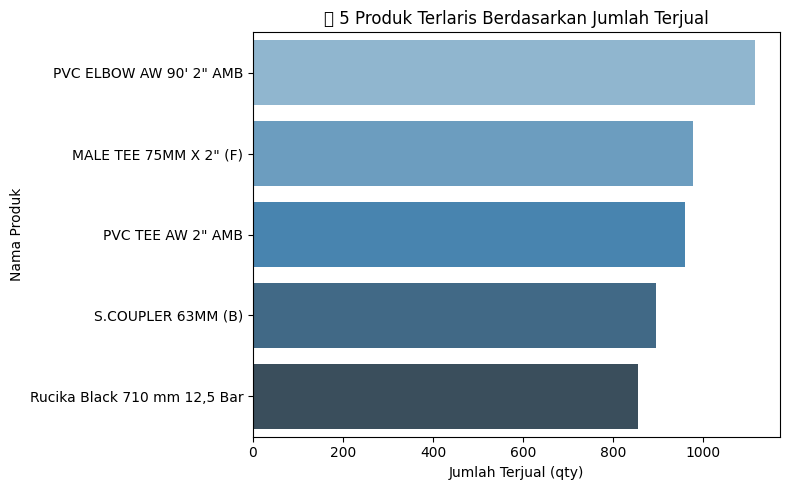

In [26]:
# ==========================================
# 1️⃣ 5 Produk Terlaris (berdasarkan qty)
# ==========================================
top5_produk = (
    df.groupby('nama_barang')['qty']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

#print("🛒 5 Produk Terlaris:")
#display(top5_produk)

plt.figure(figsize=(8,5))
sns.barplot(x=top5_produk.values, y=top5_produk.index, palette="Blues_d")
plt.title("🔥 5 Produk Terlaris Berdasarkan Jumlah Terjual")
plt.xlabel("Jumlah Terjual (qty)")
plt.ylabel("Nama Produk")
plt.tight_layout()
plt.show()


In [18]:
# --- Konversi kolom numerik yang salah format ---
for col in ['harga_barang', 'qty', 'total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah jadi angka, jika tidak bisa -> NaN

# --- Hilangkan data kosong atau tidak valid ---
df = df.dropna(subset=['nama_barang', 'qty', 'harga_barang', 'total'])
df = df[df['qty'] > 0]

print("\nData setelah dibersihkan:")
display(df.head())




Data setelah dibersihkan:


,id_penjualan,tgl_penjualan,id_customer,nama_customer,id_barang,nama_barang,harga_barang,qty,total,id_karyawan,nama_karyawan,id_supplier,nama_supplier
0,SELL-0001,2024-01-05,CUS-0060,Rian Cahyani,B-00019,"Rucika Black 630 mm 12,5 Bar",2633748,32,84279936,K-00009,Romy Sumanto,SPL-0005,CV. Tirta Guna Mandiri
1,SELL-0002,2024-01-05,CUS-0061,Nina Wijaya,B-00020,"Rucika Black 710 mm 12,5 Bar",3344380,200,668876000,K-00008,Aliando Gunawan,SPL-0005,CV. Tirta Guna Mandiri
2,SELL-0003,2024-01-05,CUS-0062,Putri Yuliana,B-00001,"BALL VALVE FEMALE 3/4""\t",22878,342,7824276,K-00005,Syawal Awaliyah,SPL-0001,PT. Golden Piping Indonesia
3,SELL-0004,2024-01-05,CUS-0063,Tia Herlina,B-00002,"BALL VALVE FEMALE 1 1/4""",50840,76,3863840,K-00007,Kesya Putri,SPL-0001,PT. Golden Piping Indonesia
4,SELL-0005,2024-01-05,CUS-0064,Budi Wibowo,B-00003,"PVC ELBOW AW 90' 2"" AMB",1840,59,108560,K-00009,Romy Sumanto,SPL-0001,PT. Golden Piping Indonesia


In [19]:
# =====================================================
# 2️⃣ TOTAL PENJUALAN TERTINGGI - Donut Chart (Pie)
# =====================================================
import plotly.express as px # Import plotly.express

top_total = (
    df.groupby('nama_barang', as_index=False)['total']
    .sum()
    .sort_values(by='total', ascending=False)
    .head(6)
)

fig = px.pie(
    top_total,
    names='nama_barang',
    values='total',
    hole=0.4,
    title='💰 Proporsi Total Penjualan Produk Tertinggi',
    color_discrete_sequence=px.colors.sequential.Greens_r
)
fig.show()

/tmp/ipython-input-13716186.py:16: UserWarning:

Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-13716186.py:16: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.



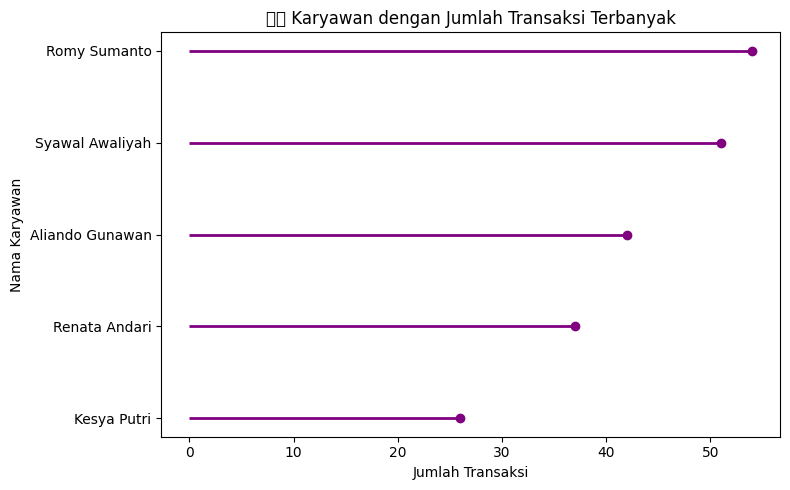

In [20]:
# =====================================================
# 3️⃣ KARYAWAN TERBANYAK TRANSAKSI - Lollipop Chart
# =====================================================
top_karyawan = (
    df.groupby('nama_karyawan', as_index=False)['qty']
    .count()
    .sort_values(by='qty', ascending=True)
)

plt.figure(figsize=(8,5))
plt.hlines(y=top_karyawan['nama_karyawan'], xmin=0, xmax=top_karyawan['qty'], color='purple', linewidth=2)
plt.plot(top_karyawan['qty'], top_karyawan['nama_karyawan'], 'o', color='purple')
plt.title('👨‍💼 Karyawan dengan Jumlah Transaksi Terbanyak')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Nama Karyawan')
plt.tight_layout()
plt.show()

In [21]:
!pip install squarify

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.



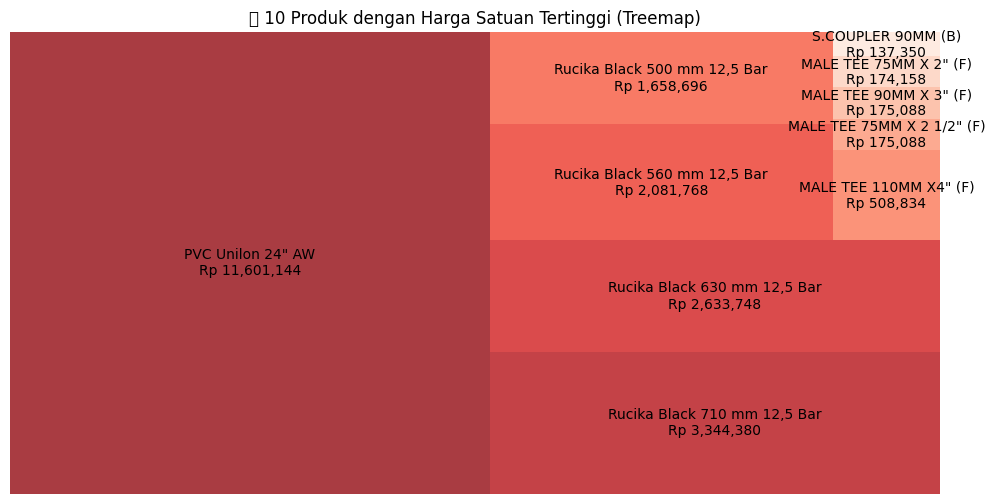

In [22]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataframe again in case the kernel restarted
file_path = '/content/new_gudang pipa.xlsx'  # Ganti sesuai lokasi file di Colab
df = pd.read_excel(file_path, sheet_name="fact_penjualan") # Load the fact_penjualan sheet

# --- Membersihkan nama kolom ---
df.columns = df.columns.str.strip()

# --- Konversi kolom tanggal jika ada ---
for col in df.columns:
    if 'tgl' in col.lower() or 'tanggal' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')
        tanggal_col = col
        break
else:
    tanggal_col = None

# --- Konversi kolom numerik (jumlah, total penjualan, harga) ---
numeric_cols = []
for col in df.columns:
    if any(x in col.lower() for x in ['jumlah', 'qty', 'total', 'harga']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
        numeric_cols.append(col)

# --- Konversi kolom numerik yang salah format ---
for col in ['harga_barang', 'qty', 'total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah jadi angka, jika tidak bisa -> NaN

# --- Hilangkan data kosong atau tidak valid ---
df = df.dropna(subset=['nama_barang', 'qty', 'harga_barang', 'total'])
df = df[df['qty'] > 0]


# =====================================================
# 4️⃣ PRODUK DENGAN HARGA TERTINGGI - Treemap
# =====================================================
top_harga = (
    df[['nama_barang', 'harga_barang']]
    .drop_duplicates(subset='nama_barang')
    .sort_values(by='harga_barang', ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=top_harga['harga_barang'],
    label=[f"{x}\nRp {y:,.0f}" for x, y in zip(top_harga['nama_barang'], top_harga['harga_barang'])],
    alpha=0.8,
    color=sns.color_palette('Reds_r', len(top_harga))
)
plt.title('💸 10 Produk dengan Harga Satuan Tertinggi (Treemap)')
plt.axis('off')
plt.show()

In [23]:
import plotly.express as px

fig = px.box(df, x='nama_karyawan', y='total', color='nama_karyawan',
             title="📦 Distribusi Total Penjualan per Karyawan (Interaktif)")
fig.show()


In [24]:
# ========================================================
# 1️⃣ SUPPLIER DENGAN TOTAL PENJUALAN TERTINGGI
# ========================================================
# --- Supplier dengan total penjualan tertinggi (FIXED) ---
top_supplier = (
    df.groupby('nama_supplier', as_index=False)['total']
    .sum()
    .sort_values(by='total', ascending=False)
)

import plotly.express as px

fig = px.bar(
    top_supplier,
    x='nama_supplier',
    y='total',
    color='total',
    text=top_supplier['total'].apply(lambda x: f"Rp {x:,.0f}"),
    title='🏆 Supplier dengan Total Penjualan Tertinggi',
    color_continuous_scale='Viridis'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Nama Supplier',
    yaxis_title='Total Penjualan (Rp)',
    xaxis_tickangle=-30,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=22, color='darkblue'),
    font=dict(size=12)
)

fig.show()

/tmp/ipython-input-2738743421.py:17: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



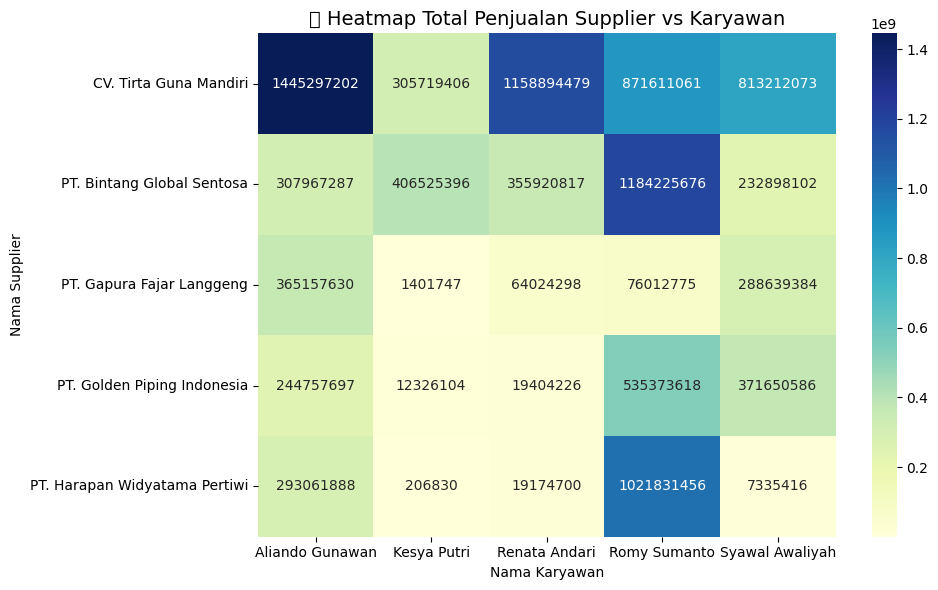

In [25]:
# ========================================================
# 4️⃣ GRAFIK TAMBAHAN (HEATMAP) UNTUK SUPPLIER VS KARYAWAN
# ========================================================
pivot = df.pivot_table(
    index='nama_supplier',
    columns='nama_karyawan',
    values='total',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('🔥 Heatmap Total Penjualan Supplier vs Karyawan', fontsize=14)
plt.xlabel('Nama Karyawan')
plt.ylabel('Nama Supplier')
plt.tight_layout()
plt.show()